<a href="https://colab.research.google.com/github/sultanbst123/AnalyticsVidya_HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Modelling with Python

##Library & File

In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

     |████████████████████████████████| 76.4 MB 23 kB/s 
     |████████████████████████████████| 308 kB 5.5 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 209 kB 35.6 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 111 kB 30.2 MB/s 
     |████████████████████████████████| 144 kB 47.7 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=41c22142f7d6db3739e965540d80a4692cc03b907a15bf9b474fb1ffe7a71179
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 371 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_6

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 23.2 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay


import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Hr analytics/train_HR_analytics(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Hr analytics/test_HR_analytics(clean).csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  int64  
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
 12  new_region            54808 non-null  object 
 13  new                   54808 non-null  float64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  int64  
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
 12  new_region            54808 non-null  object 
 13  new                   54808 non-null  float64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Split

In [ ]:
cater = train.select_dtypes(exclude="number").columns

In [ ]:
# ubah ke category

for i in [train, test]: 
    i[cater] = i[cater].astype("category")

In [ ]:

tester = test 

x = train.drop("is_promoted", axis=1)
y = train.is_promoted

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x, y, test_size = 0.2,random_state=29,stratify=y)

In [ ]:
x_train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,new_region,new
2918,Operations,Bachelor's,f,other,2,26,4,1,1,1,61,region[10-20],60.153233
16861,Technology,Master's & above,m,other,1,45,4,5,1,0,82,region[1-10],79.747041
41307,Finance,Bachelor's,f,other,1,27,4,1,1,0,56,region[1-10],60.178368
38867,Sales & Marketing,Bachelor's,f,sourcing,1,31,4,5,0,0,46,region[1-10],49.979904
54107,Sales & Marketing,Master's & above,m,other,2,34,3,7,1,0,47,region[20-34],50.410785


## Feature-selection

In [ ]:
lg = LGBMClassifier(random_state=92)

In [ ]:
lg.fit(x_train, y_train)

LGBMClassifier(random_state=92)

In [ ]:
print(f"accuracy train: {lg.score(x_train, y_train)}")
print(f"accuracy val: {lg.score(x_val, y_val)}")

accuracy train: 0.9454682297130867
accuracy val: 0.9419813902572524


In [ ]:
pred = lg.predict(x_val)

In [ ]:
f1_score(y_val, pred)

0.5015673981191222

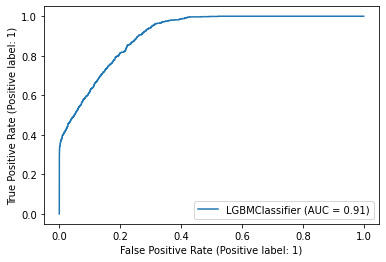

In [ ]:
plot_roc_curve(lg,x_val, y_val)

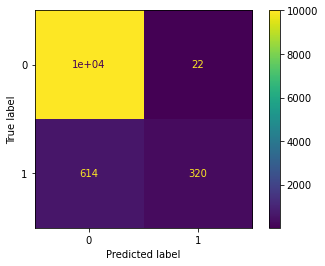

In [ ]:
plot_confusion_matrix(lg, x_val, y_val)

In [ ]:
fs = BorutaShap(model=lg,
                importance_measure="shap",
                classification = True)

In [ ]:
fs.fit(X=x_train, y=y_train, n_trials=10,random_state=0)

  0%|          | 0/10 [00:00<?, ?it/s]

8 attributes confirmed important: ['department', 'age', 'KPIs_met >80%', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'new', 'awards_won?']
4 attributes confirmed unimportant: ['no_of_trainings', 'education', 'recruitment_channel', 'gender']
1 tentative attributes remains: ['new_region']


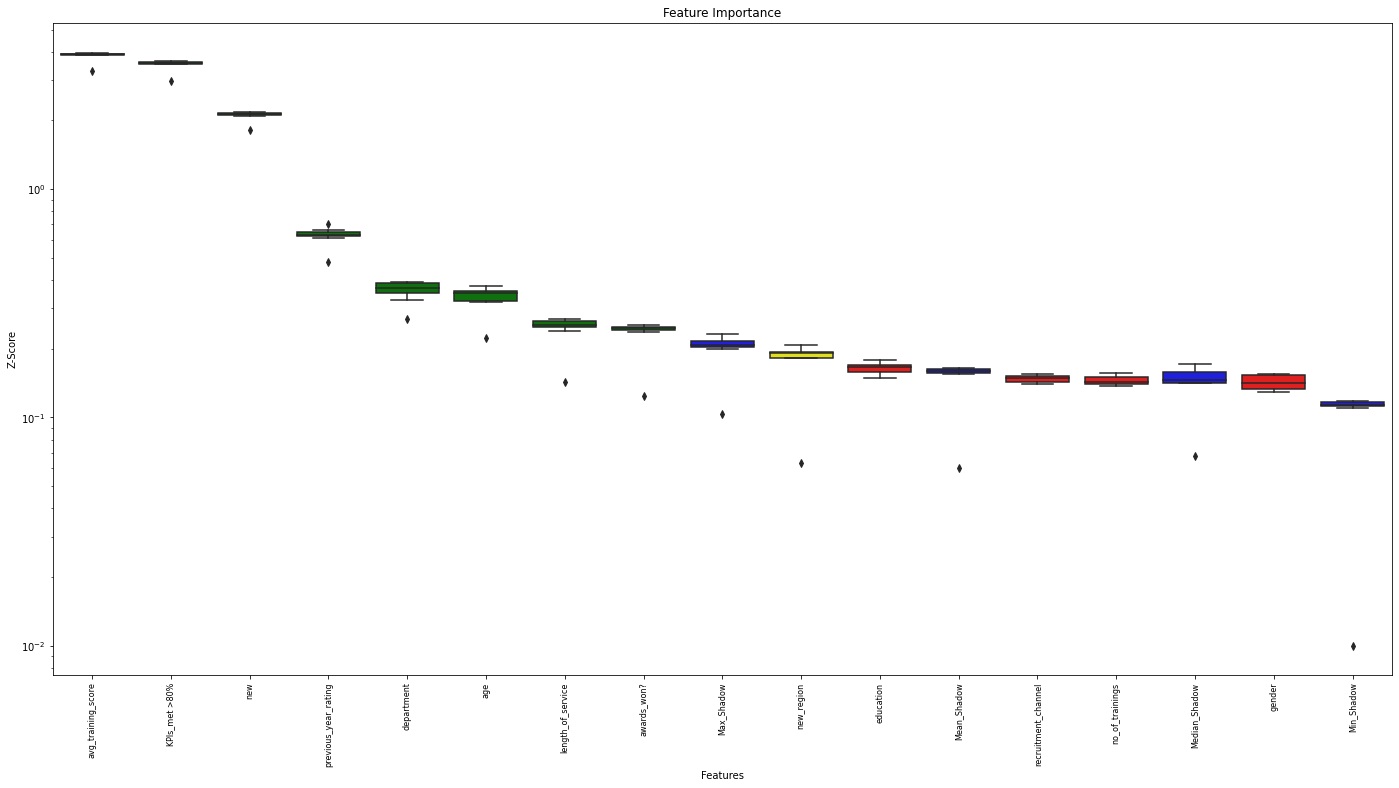

In [ ]:
fs.plot(which_features='all', figsize=(24,12))

In [ ]:
col = fs.Subset().columns.to_list()

In [ ]:
col

['department',
 'age',
 'KPIs_met >80%',
 'previous_year_rating',
 'length_of_service',
 'avg_training_score',
 'new',
 'awards_won?']

In [ ]:
# coba lagi 
lg.fit(x_train[col], y_train)

LGBMClassifier(random_state=92)

In [ ]:
print(f"accuracy train: {lg.score(x_train[col], y_train)}")
print(f"accuracy val: {lg.score(x_val[col], y_val)}")

accuracy train: 0.9454910368106555
accuracy val: 0.9421638387155629


In [ ]:
pred = lg.predict(x_val[col])

In [ ]:
f1_score(y_val, pred)

0.5031347962382445

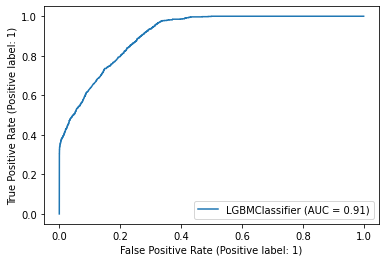

In [ ]:
plot_roc_curve(lg,x_val[col], y_val)

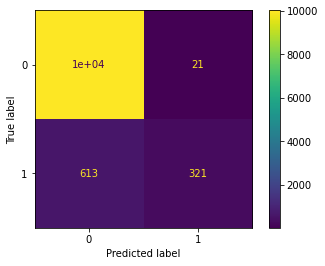

In [ ]:
plot_confusion_matrix(lg, x_val[col], y_val)

## Model-1

In [ ]:
f1 = []
acc_train = []
acc_val = []

In [ ]:
x_train_1 = x_train[col]
x_val_1 = x_val[col]

In [ ]:
x_train_1.head()

,department,age,KPIs_met >80%,previous_year_rating,length_of_service,avg_training_score,new,awards_won?
2918,Operations,26,1,4,1,61,60.153233,1
16861,Technology,45,1,4,5,82,79.747041,0
41307,Finance,27,1,4,1,56,60.178368,0
38867,Sales & Marketing,31,0,4,5,46,49.979904,0
54107,Sales & Marketing,34,1,3,7,47,50.410785,0


In [ ]:
cater = x_train_1.select_dtypes(exclude="number").columns

In [ ]:
le = {}
for i in cater:
    le[i] = LabelEncoder()
    x_train_1[i] = le[i].fit_transform(x_train_1[i]) 
    x_val_1[i] = le[i].transform(x_val_1[i])

In [ ]:
x_train_1.head()

,department,age,KPIs_met >80%,previous_year_rating,length_of_service,avg_training_score,new,awards_won?
2918,4,26,1,4,1,61,60.153233,1
16861,8,45,1,4,5,82,79.747041,0
41307,1,27,1,4,1,56,60.178368,0
38867,7,31,0,4,5,46,49.979904,0
54107,7,34,1,3,7,47,50.410785,0


In [ ]:
XGB = XGBClassifier(random_state=10)
GBT = GradientBoostingClassifier(random_state=20)
HGBT = HistGradientBoostingClassifier(random_state=30)
ADA = AdaBoostClassifier(random_state=40)
EXT = ExtraTreeClassifier(random_state=50)
RF = RandomForestClassifier(random_state=60)
DT = DecisionTreeClassifier(random_state=70)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)
 
    #score train dan val
    acc_train.append(model.score(x_train, y_train)) 
    acc_val.append(model.score(x_val, y_val)) 
        
    #f1 score
    pred = model.predict(x_val)
    score = f1_score(y_val, pred) 
    f1.append(score) 
    
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBClassifier(random_state=10)
->->->->->->->->->-> DONE
------------------------------
AdaBoostClassifier(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingClassifier(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingClassifier(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeClassifier(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestClassifier(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeClassifier(random_state=50)
->->->->->->->->->-> DONE


## Model-2

In [ ]:
x_train_2 = x_train[col]
x_val_2 = x_val[col]

In [ ]:
x_train_2.dtypes

department              category
age                        int64
KPIs_met >80%              int64
previous_year_rating       int64
length_of_service          int64
avg_training_score         int64
new                      float64
awards_won?                int64
dtype: object

In [ ]:
CB = CatBoostClassifier(random_state=12)
LGBM = LGBMClassifier(random_state=14)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)
 
       #accuracy train dan val
       acc_train.append(model.score(x_train, y_train))
       acc_val.append(model.score(x_val, y_val))
     
       #f1 score      
       pred = model.predict(x_val)
       score = f1_score(y_val, pred)
       f1.append(score)
 
   #catboost
    else:         
       model.fit(x_train,y_train,cat_features=cater.to_list(),verbose=False)
 
       #accuracy train dan val
       acc_train.append(model.score(x_train, y_train))
       acc_val.append(model.score(x_val, y_val))
          
       #f1 score
       pred = model.predict(x_val)
       score = f1_score(y_val, pred)
       f1.append(score)

    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMClassifier(random_state=14)
->->->->->->->->->-> DONE


## Model-3

In [ ]:
x_train_3 = x_train[col]
x_val_3 = x_val[col]

In [ ]:
x_train_3

,department,age,KPIs_met >80%,previous_year_rating,length_of_service,avg_training_score,new,awards_won?
2918,Operations,26,1,4,1,61,60.153233,1
16861,Technology,45,1,4,5,82,79.747041,0
41307,Finance,27,1,4,1,56,60.178368,0
38867,Sales & Marketing,31,0,4,5,46,49.979904,0
54107,Sales & Marketing,34,1,3,7,47,50.410785,0
...,...,...,...,...,...,...,...,...
43148,Sales & Marketing,54,0,4,27,53,50.404624,0
1305,Sales & Marketing,32,1,3,6,47,50.264516,0
49992,Sales & Marketing,41,1,4,1,49,50.410785,1
1092,Procurement,54,0,3,16,73,70.030541,0


In [ ]:
sc = StandardScaler()
x_train_3.iloc[:,1:] = sc.fit_transform(x_train_3.iloc[:,1:]) 
x_val_3.iloc[:,1:] = sc.transform(x_val_3.iloc[:,1:])

In [ ]:
x_val_3.head()

,department,age,KPIs_met >80%,previous_year_rating,length_of_service,avg_training_score,new,awards_won?
3717,Sales & Marketing,0.415160,-0.736262,-1.094148,0.737719,-0.776001,-1.069010,-0.155178
47135,Finance,-0.627258,1.358213,-0.273139,0.033146,0.047647,-0.251123,-0.155178
20309,Procurement,2.890901,-0.736262,-0.273139,2.381722,0.347156,0.540359,-0.155178
46728,Procurement,-0.627258,1.358213,-0.273139,-0.436570,0.571787,0.532330,-0.155178
42543,Sales & Marketing,-0.106049,-0.736262,0.547870,0.033146,-1.000633,-1.046280,-0.155178


In [ ]:
x_train_3 = pd.get_dummies(x_train_3)
x_val_3 = pd.get_dummies(x_val_3)

In [ ]:
x_val_3.head()

,age,KPIs_met >80%,previous_year_rating,length_of_service,avg_training_score,new,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
3717,0.415160,-0.736262,-1.094148,0.737719,-0.776001,-1.069010,-0.155178,0,0,0,0,0,0,0,1,0
47135,-0.627258,1.358213,-0.273139,0.033146,0.047647,-0.251123,-0.155178,0,1,0,0,0,0,0,0,0
20309,2.890901,-0.736262,-0.273139,2.381722,0.347156,0.540359,-0.155178,0,0,0,0,0,1,0,0,0
46728,-0.627258,1.358213,-0.273139,-0.436570,0.571787,0.532330,-0.155178,0,0,0,0,0,1,0,0,0
42543,-0.106049,-0.736262,0.547870,0.033146,-1.000633,-1.046280,-0.155178,0,0,0,0,0,0,0,1,0


In [ ]:
LR = LogisticRegression(random_state=14)
KNN = KNeighborsClassifier() 
SGDC = SGDClassifier(random_state=19)
#SVM = SVC(kernel="linear",random_state=73,probability=True)

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)
 
    #score train dan val
    acc_train.append(model.score(x_train, y_train)) 
    acc_val.append(model.score(x_val, y_val)) 
        
    #f1 score
    pred = model.predict(x_val)
    score = f1_score(y_val, pred) 
    f1.append(score) 
    
    return model

In [ ]:
for i in [LR,KNN,SGDC]:
    print(30*"-")
    print(i)
    score_3(i, x_train_3, y_train, x_val_3, y_val)
    print(10*"->" + " DONE")

------------------------------
LogisticRegression(random_state=14)
->->->->->->->->->-> DONE
------------------------------
KNeighborsClassifier()
->->->->->->->->->-> DONE
------------------------------
SGDClassifier(random_state=19)
->->->->->->->->->-> DONE


## Model - selection

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","CB","LGBM","LR","KNN","SGDC"], 
                          "Train_accuracy": acc_train, 
                          "Val_accuracy": acc_val,
                          "f1_score": f1})
#all_models = all_models.set_index("models")

In [ ]:
all_models

,models,Train_accuracy,Val_accuracy,f1_score
0,XGB,0.941454,0.941160,0.480258
1,ADA,0.924919,0.925014,0.319536
2,GBT,0.942389,0.941981,0.490385
3,HGBT,0.944465,0.942711,0.506289
4,DT,0.991128,0.902299,0.433633
5,RF,0.991105,0.932494,0.486824
6,EXT,0.991128,0.904671,0.403198
7,CB,0.946677,0.942711,0.509375
8,LGBM,0.945491,0.942164,0.503135
9,LR,0.932537,0.933680,0.403610


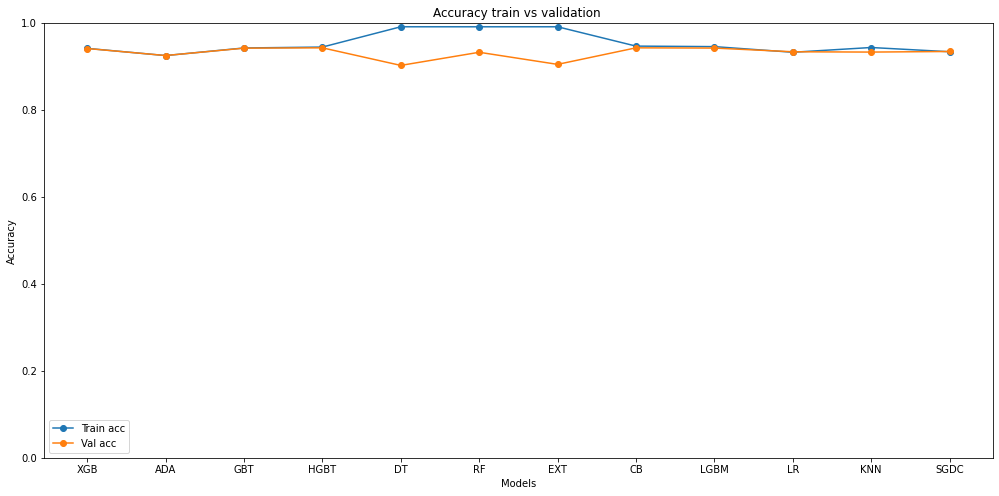

In [ ]:

plt.figure(figsize=(17, 8)) 
plt.plot(all_models.models, all_models.Train_accuracy,marker="o",label="Train acc")
plt.plot(all_models.models, all_models.Val_accuracy,marker="o", label="Val acc")
plt.ylim([0,1.00])
plt.title("Accuracy train vs validation ")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()

## Hyperparameter tuning

In [ ]:
#catboost
def objective(trial):
    
    params = {#'loss_function':'Logloss',              
              #'eval_metric':'Accuracy',
              'task_type' : trial.suggest_categorical("task_type",["GPU"]),
              'boosting_type': trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),            
              'bootstrap_type':trial.suggest_categorical("bootstrap_type",["Bernoulli"]), #"MVS"]),#"Bayesian" 
              'iterations':trial.suggest_categorical("iterations", [10000]),
              'od_wait':trial.suggest_int('od_wait', 500, 2000), 
              'random_strength': trial.suggest_uniform('random_strength',10,50), 
              'learning_rate' : trial.suggest_uniform('learning_rate',0.01,0.3),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'depth': trial.suggest_int('depth',1,10),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
               }
    model = CatBoostClassifier(**params)  
    model.fit(x_train[col],y_train,eval_set=[(x_val[col],y_val)],verbose=False,early_stopping_rounds=100, 
              cat_features = cater.to_list())#catfeatures for category cols
        
    y_preds = model.predict(x_val[col])   
    f1 = f1_score(y_val, y_preds)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize') #for loss
study.optimize(objective, n_trials=50)

[I 2021-10-27 08:04:20,429] A new study created in memory with name: no-name-12378f64-5635-4fb2-9dae-82ad16a258d5
[I 2021-10-27 08:05:25,530] Trial 0 finished with value: 0.5117004680187207 and parameters: {'task_type': 'GPU', 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'iterations': 10000, 'od_wait': 1224, 'random_strength': 28.087840467164455, 'learning_rate': 0.10077879978504381, 'reg_lambda': 32.89271167641243, 'subsample': 0.4338028152864343, 'depth': 9, 'min_data_in_leaf': 1, 'leaf_estimation_iterations': 4}. Best is trial 0 with value: 0.5117004680187207.
[I 2021-10-27 08:06:12,888] Trial 1 finished with value: 0.5139751552795031 and parameters: {'task_type': 'GPU', 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'iterations': 10000, 'od_wait': 1086, 'random_strength': 24.522453380293552, 'learning_rate': 0.14974191471966208, 'reg_lambda': 93.56823131502333, 'subsample': 0.5842155685010583, 'depth': 4, 'min_data_in_leaf': 9, 'leaf_estimation_iterations'

In [ ]:
cb_params = study.best_trial.params
cb_params

{'boosting_type': 'Ordered',
 'bootstrap_type': 'Bernoulli',
 'depth': 6,
 'iterations': 10000,
 'leaf_estimation_iterations': 3,
 'learning_rate': 0.058306937856818564,
 'min_data_in_leaf': 15,
 'od_wait': 1695,
 'random_strength': 46.28913076056758,
 'reg_lambda': 23.954942895007285,
 'subsample': 0.4726432043058453,
 'task_type': 'GPU'}

## Cross-Validation

In [ ]:
def cross_val(X, y, model, params, folds=10):

    score = []
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
 
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],cat_features=cater.to_list(),verbose=False,early_stopping_rounds=100)

        pred = alg.predict(x_test)
        f1 = f1_score(y_test, pred)
        score.append(f1)
     
        print(f" F1_score: {f1}")
        print("-"*50)
     
    print("\nmean F1_score:",np.array(score).mean())

    return alg

In [ ]:
x_new = x[col]
y_new = y

In [ ]:
score_cb = cross_val(x_new, y_new, CatBoostClassifier, cb_params)

Fold: 1
 F1_score: 0.5349922239502334
--------------------------------------------------
Fold: 2
 F1_score: 0.503125
--------------------------------------------------
Fold: 3
 F1_score: 0.51875
--------------------------------------------------
Fold: 4
 F1_score: 0.47543581616481767
--------------------------------------------------
Fold: 5
 F1_score: 0.5294117647058822
--------------------------------------------------
Fold: 6
 F1_score: 0.51875
--------------------------------------------------
Fold: 7
 F1_score: 0.5115562403697997
--------------------------------------------------
Fold: 8
 F1_score: 0.4897314375987362
--------------------------------------------------
Fold: 9
 F1_score: 0.5314900153609831
--------------------------------------------------
Fold: 10
 F1_score: 0.49520766773162944
--------------------------------------------------

mean F1_score: 0.5108450165882081


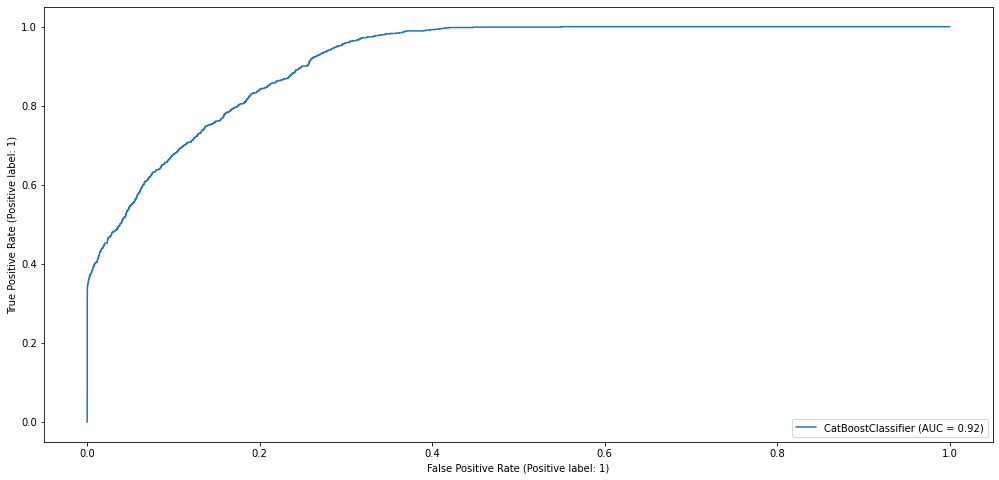

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(17, 8))
 
plot_roc_curve(score_cb, x_val[col], y_val, ax=ax)

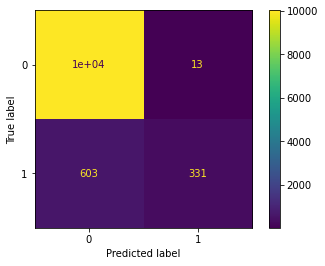

In [ ]:
plot_confusion_matrix(score_cb, x_val[col], y_val)

In [ ]:
pred = score_cb.predict(x_val[col])

In [ ]:
classification_report(y_val, pred)

'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97     10028\n           1       0.96      0.35      0.52       934\n\n    accuracy                           0.94     10962\n   macro avg       0.95      0.68      0.74     10962\nweighted avg       0.94      0.94      0.93     10962\n'

In [ ]:
f1_score(y_val, pred)

0.5179968701095462

In [ ]:
# make a submission
sub = pd.read_csv("/content/drive/MyDrive/Hr analytics/sample_submission.csv")

In [ ]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [ ]:
sub.is_promoted = score_cb.predict(tester[col])

In [ ]:
sub.sample(10)

,employee_id,is_promoted
3428,43607,0
9736,28568,0
1587,56576,0
10548,29053,0
10066,59422,0
11376,51683,0
7274,54768,1
19752,58133,0
5549,9781,0
4220,64009,0


In [ ]:
sub.to_csv("my_subs.csv", index=False)